In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Nacimientos.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113837 entries, 0 to 113836
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   identificador                113791 non-null  float64
 1   DEPARTAMENTO                 113837 non-null  object 
 2   MUNICIPIO                    113837 non-null  object 
 3   AREA NACIMIENTO              113837 non-null  object 
 4   SITIO NACIMIENTO             113837 non-null  object 
 5   CÓDIGO INSTITUCIÓN           113837 non-null  object 
 6   NOMBRE INSTITUCIÓN           113837 non-null  object 
 7   SEXO                         113837 non-null  object 
 8   PESO (Gramos)                113837 non-null  float64
 9   TALLA (Centímetros)          113837 non-null  int64  
 10  FECHA NACIMIENTO             113837 non-null  object 
 11  PARTO ATENDIDO POR           113837 non-null  object 
 12  TIEMPO DE GESTACIÓN          11381


Valores faltantes por columna:
identificador                      46
DEPARTAMENTO                        0
MUNICIPIO                           0
AREA NACIMIENTO                     0
SITIO NACIMIENTO                    0
CÓDIGO INSTITUCIÓN                  0
NOMBRE INSTITUCIÓN                  0
SEXO                                0
PESO (Gramos)                       0
TALLA (Centímetros)                 0
FECHA NACIMIENTO                    0
PARTO ATENDIDO POR                  0
TIEMPO DE GESTACIÓN                19
NÚMERO CONSULTAS PRENATALES         0
TIPO PARTO                          0
FACTOR RH                        1976
PERTENENCIA ÉTNICA                 22
GRUPO INDIGENA                 113688
TIPO DOCUMENTO MADRE                0
EDAD MADRE                          0
ESTADO CONYUGAL MADRE               0
NIVEL EDUCATIVO MADRE               0
ULTIMO AÑO APROBADO MADRE        1514
PAÍS RESIDENCIA                    18
DEPARTAMENTO RESIDENCIA            94
MUNICIPIO RESIDENC

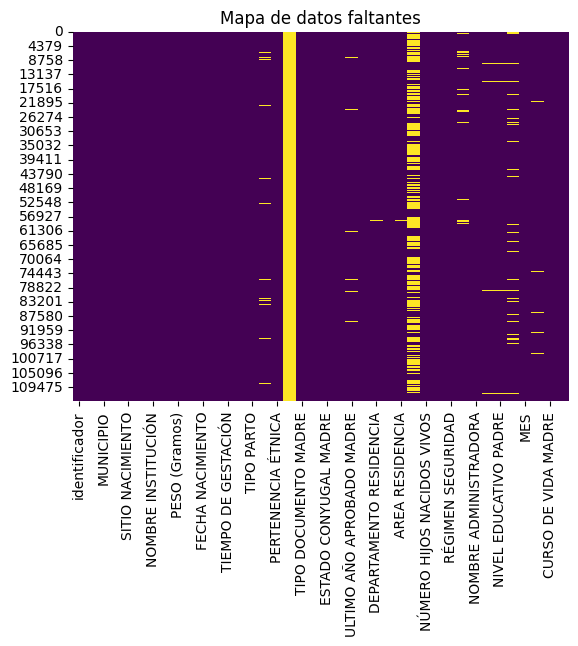

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()



Número de filas después de eliminar datos faltantes: 61

Datos faltantes por columna después de la limpieza:
identificador                  0
DEPARTAMENTO                   0
MUNICIPIO                      0
AREA NACIMIENTO                0
SITIO NACIMIENTO               0
CÓDIGO INSTITUCIÓN             0
NOMBRE INSTITUCIÓN             0
SEXO                           0
PESO (Gramos)                  0
TALLA (Centímetros)            0
FECHA NACIMIENTO               0
PARTO ATENDIDO POR             0
TIEMPO DE GESTACIÓN            0
NÚMERO CONSULTAS PRENATALES    0
TIPO PARTO                     0
FACTOR RH                      0
PERTENENCIA ÉTNICA             0
GRUPO INDIGENA                 0
TIPO DOCUMENTO MADRE           0
EDAD MADRE                     0
ESTADO CONYUGAL MADRE          0
NIVEL EDUCATIVO MADRE          0
ULTIMO AÑO APROBADO MADRE      0
PAÍS RESIDENCIA                0
DEPARTAMENTO RESIDENCIA        0
MUNICIPIO RESIDENCIA           0
AREA RESIDENCIA                0

/tmp/ipython-input-1682275421.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


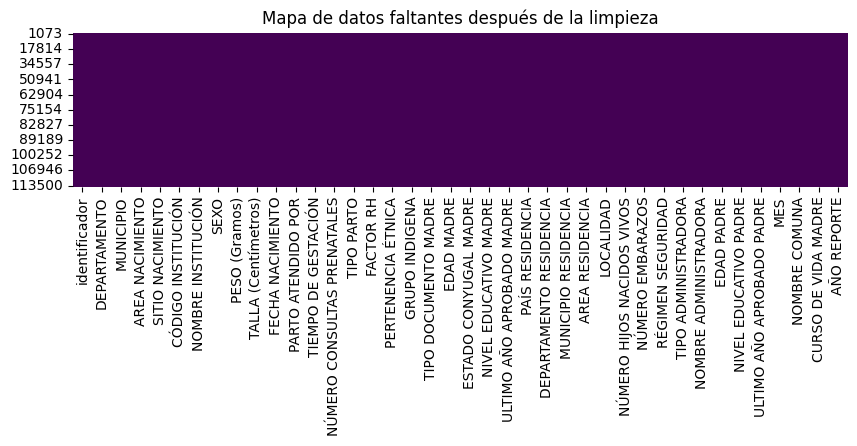

In [ ]:
# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
df_cleaned = df.copy()

df_cleaned.dropna(subset=['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN'], inplace=True)

print(f"Número de filas restantes después de eliminar nulos en columnas clave: {df_cleaned.shape[0]}")

Número de filas restantes después de eliminar nulos en columnas clave: 113818


In [ ]:
columns_to_clean = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN']

for column in columns_to_clean:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    initial_rows = df_cleaned.shape[0]
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    removed_rows = initial_rows - df_cleaned.shape[0]
    print(f"Columna '{column}': Se eliminaron {removed_rows} filas con valores atípicos. Filas restantes: {df_cleaned.shape[0]}")

print(f"\nNúmero total de filas después de eliminar nulos y valores atípicos: {df_cleaned.shape[0]}")

Columna 'PESO (Gramos)': Se eliminaron 1538 filas con valores atípicos. Filas restantes: 112280
Columna 'TALLA (Centímetros)': Se eliminaron 553 filas con valores atípicos. Filas restantes: 111727
Columna 'TIEMPO DE GESTACIÓN': Se eliminaron 114 filas con valores atípicos. Filas restantes: 111613

Número total de filas después de eliminar nulos y valores atípicos: 111613


Registros listos para graficar: 24077

Generando Histogramas...


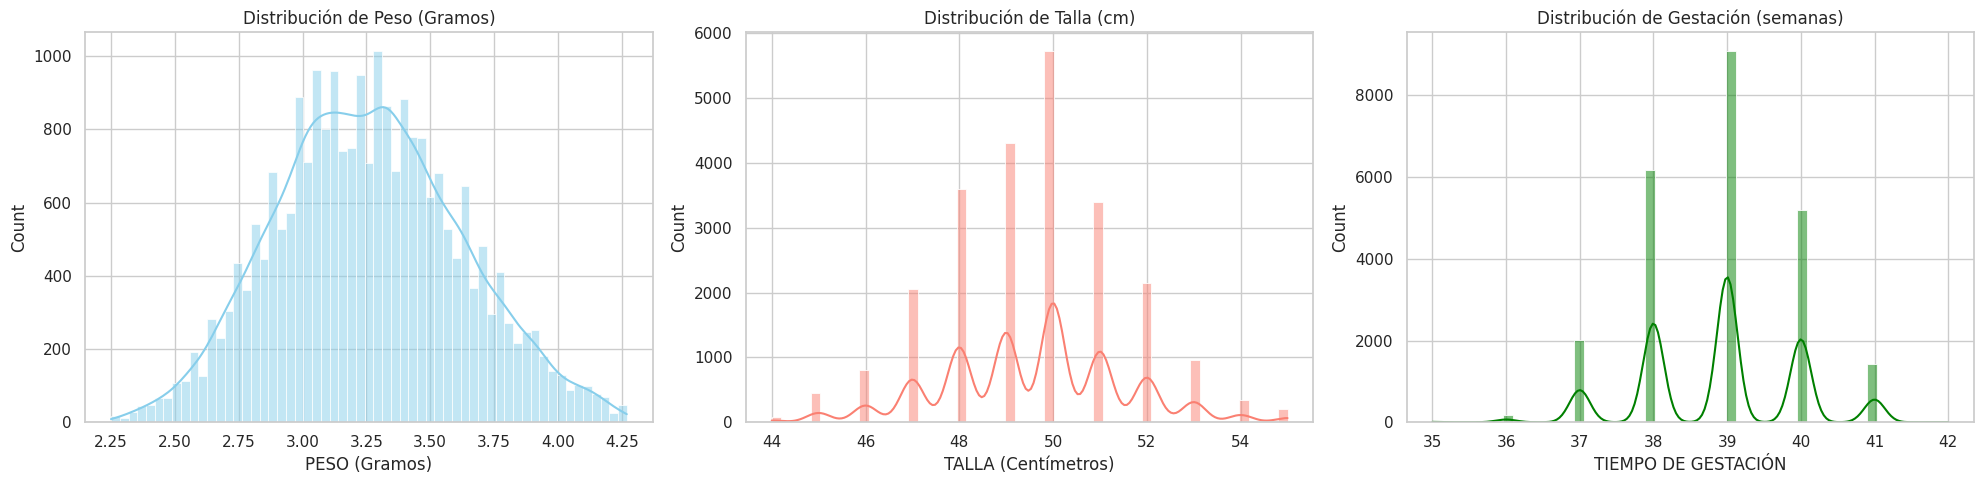


Generando Diagramas de Caja...


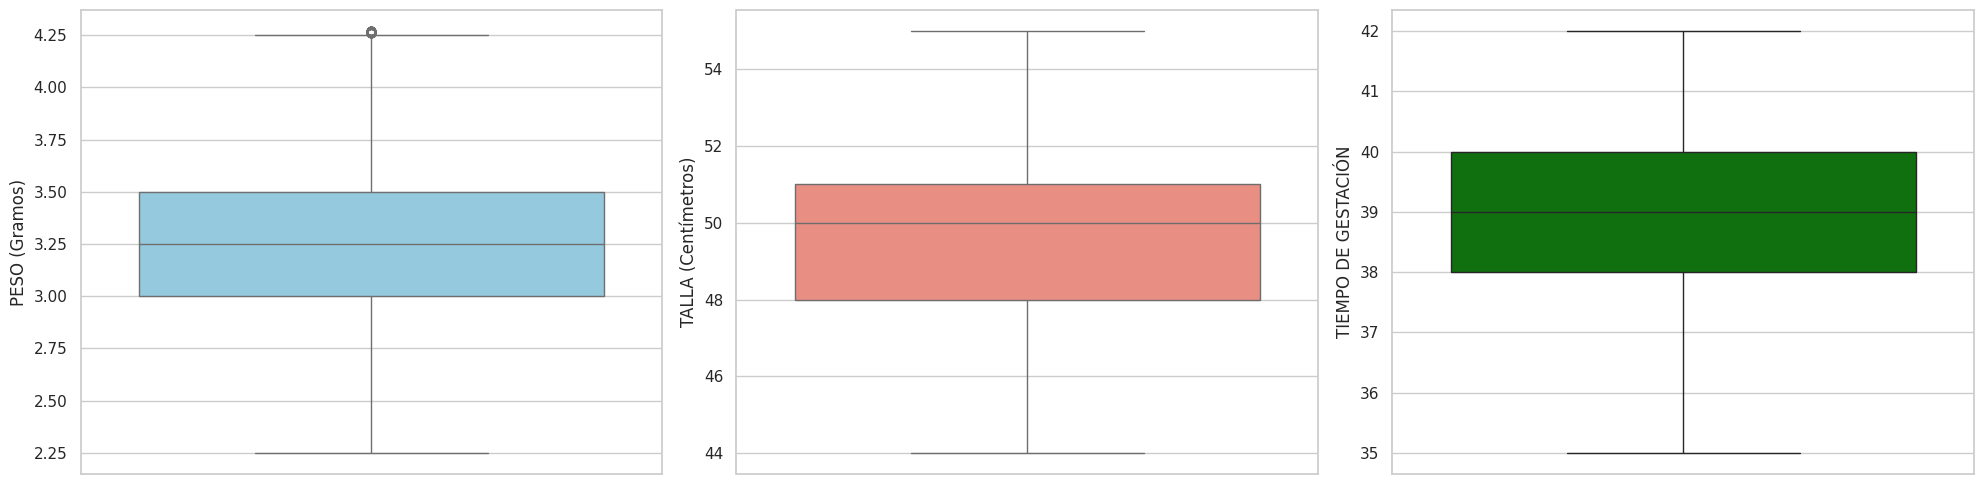


Generando Gráficos de Proporción...


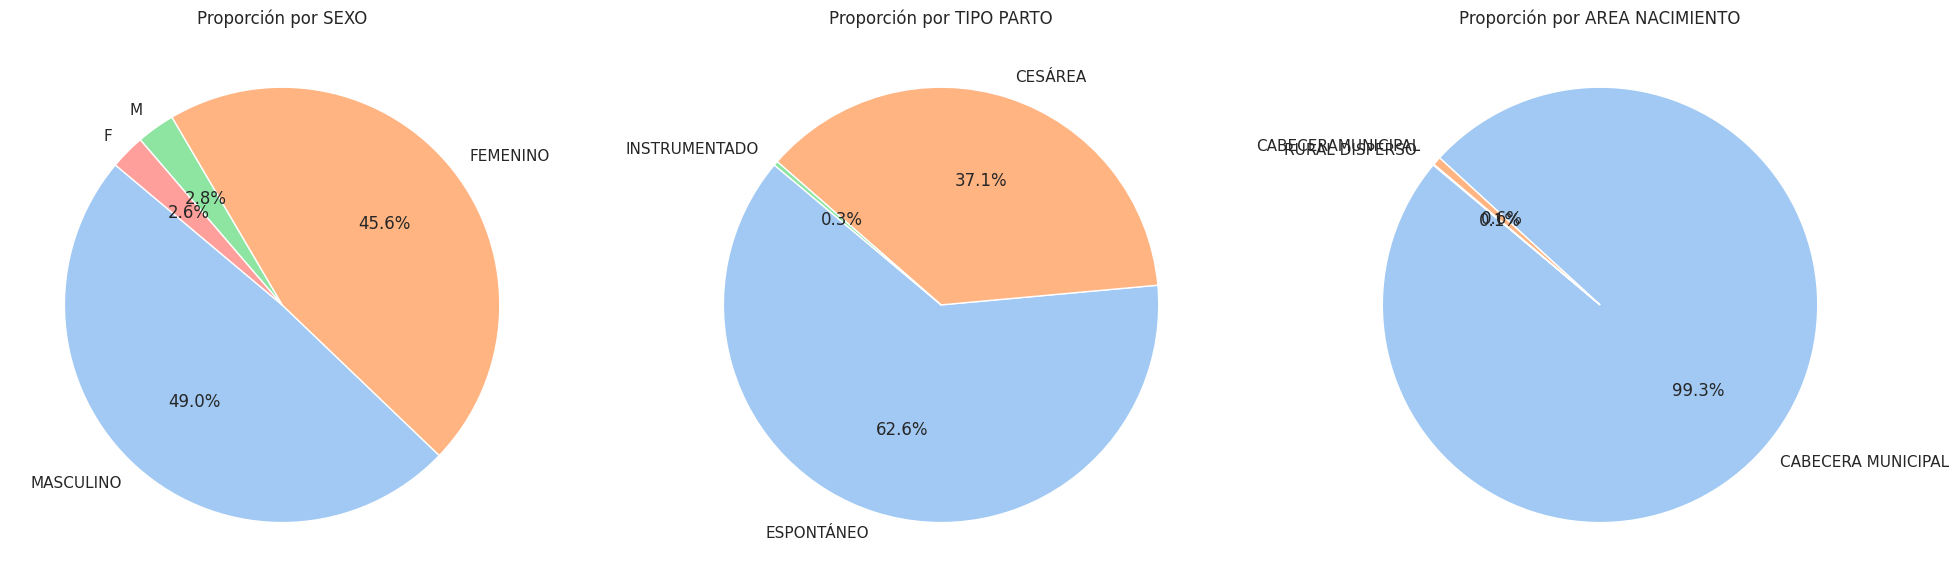

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparación de datos final
# Usamos el dataframe 'df' cargado al inicio de la tarea
cols_interes = ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN', 'SEXO', 'TIPO PARTO', 'AREA NACIMIENTO']
df_final = df[cols_interes].copy()

# Asegurar tipos numéricos y eliminar nulos
for col in ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN']:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
df_final = df_final.dropna()

# Filtrar outliers (IQR) para mejorar la visualización
for col in ['PESO (Gramos)', 'TALLA (Centímetros)', 'TIEMPO DE GESTACIÓN']:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    IQR = Q3 - Q1
    df_final = df_final[df_final[col].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]

print(f"Registros listos para graficar: {len(df_final)}")

# Configurar estilo global
sns.set_theme(style='whitegrid')

# --- GRUPO 1: HISTOGRAMAS ---
print("\nGenerando Histogramas...")
fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(data=df_final, x='PESO (Gramos)', kde=True, ax=axes1[0], color='skyblue')
axes1[0].set_title('Distribución de Peso (Gramos)')

sns.histplot(data=df_final, x='TALLA (Centímetros)', kde=True, ax=axes1[1], color='salmon')
axes1[1].set_title('Distribución de Talla (cm)')

sns.histplot(data=df_final, x='TIEMPO DE GESTACIÓN', kde=True, ax=axes1[2], color='green')
axes1[2].set_title('Distribución de Gestación (semanas)')
plt.tight_layout()
plt.show()

# --- GRUPO 2: BOXPLOTS ---
print("\nGenerando Diagramas de Caja...")
fig2, axes2 = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(data=df_final, y='PESO (Gramos)', ax=axes2[0], color='skyblue')
sns.boxplot(data=df_final, y='TALLA (Centímetros)', ax=axes2[1], color='salmon')
sns.boxplot(data=df_final, y='TIEMPO DE GESTACIÓN', ax=axes2[2], color='green')
plt.tight_layout()
plt.show()

# --- GRUPO 3: GRÁFICOS DE TORTA ---
print("\nGenerando Gráficos de Proporción...")
fig3, axes3 = plt.subplots(1, 3, figsize=(20, 6))
cat_vars = ['SEXO', 'TIPO PARTO', 'AREA NACIMIENTO']
for i, var in enumerate(cat_vars):
    counts = df_final[var].value_counts()
    axes3[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    axes3[i].set_title(f'Proporción por {var}')
plt.tight_layout()
plt.show()

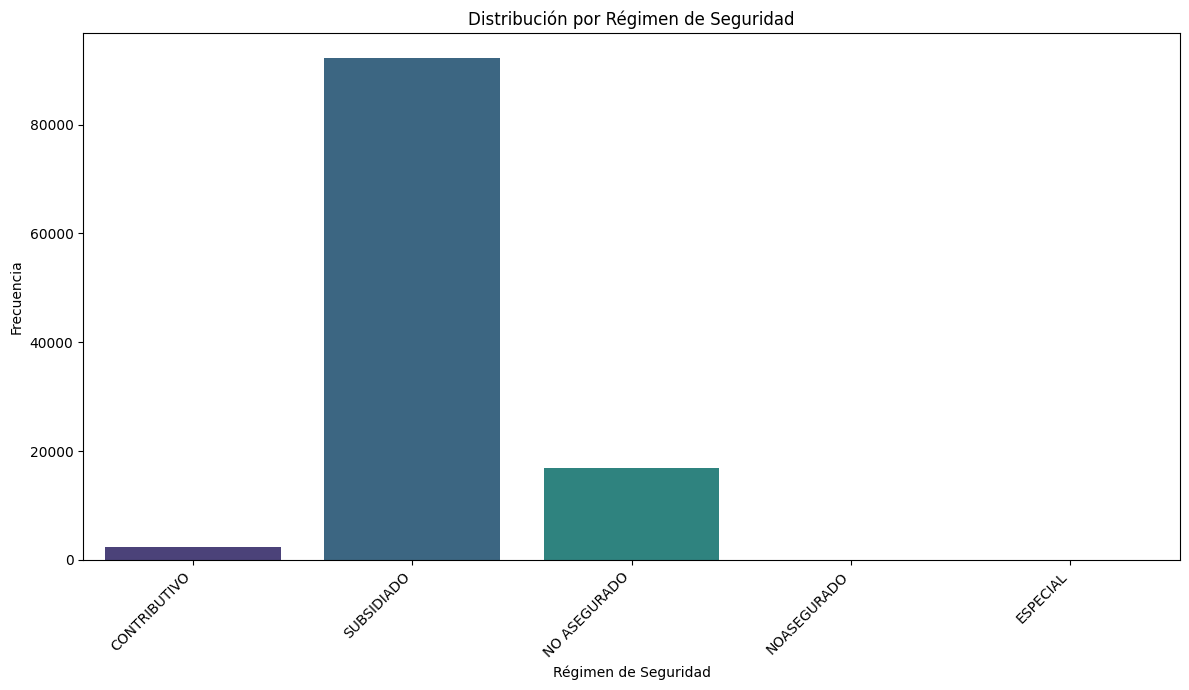

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(data=df_cleaned, x='RÉGIMEN SEGURIDAD', hue='RÉGIMEN SEGURIDAD', palette='viridis', legend=False)
plt.title('Distribución por Régimen de Seguridad')
plt.xlabel('Régimen de Seguridad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

Resultados de los tests de normalidad:

Variable: TALLA (Centímetros)
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 276.1527, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0759
  → NO es distribución normal (según consenso de tests)

Variable: PESO (Gramos)
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 15.7896, Crítico (5%): 0.7870
  Jarque-Bera p = 0.0000
  → NO es distribución normal (según consenso de tests)



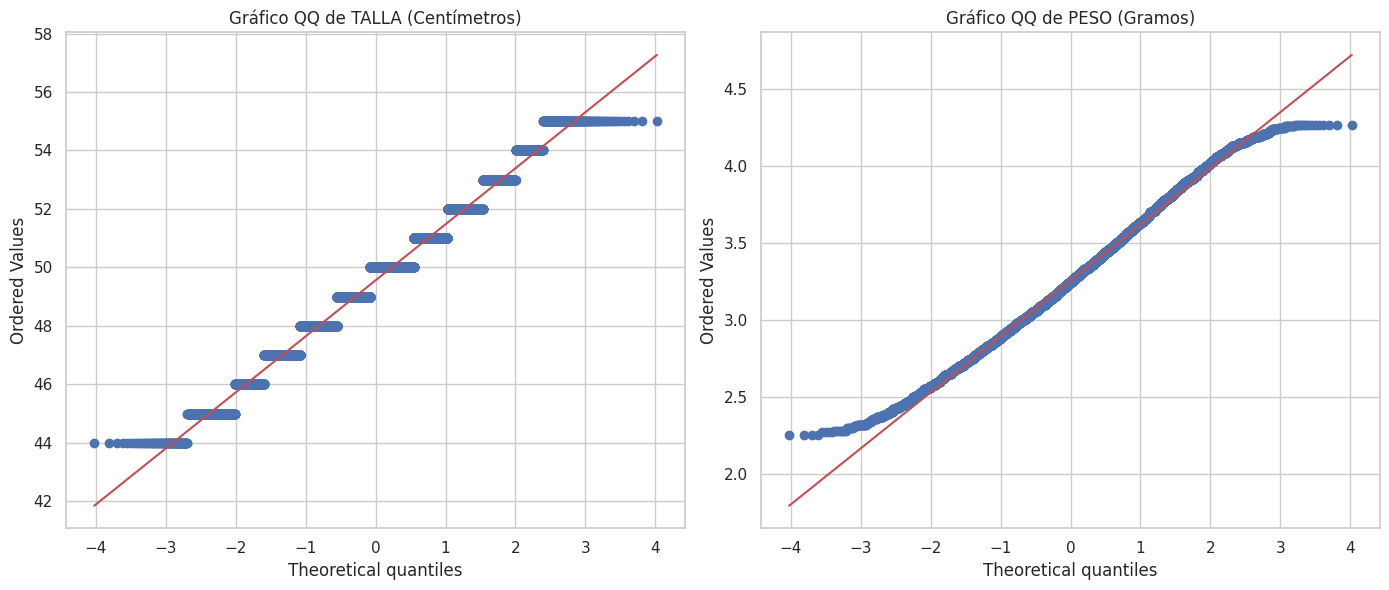

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar (usando los nombres correctos del DataFrame disponible)
columnas_fisicas = ['TALLA (Centímetros)', 'PESO (Gramos)']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable usando df_final
for col in columnas_fisicas:
    if col in df_final.columns:
        datos = df_final[col].dropna()

        # Shapiro-Wilk (se recomienda muestrear si N > 5000)
        datos_sample = datos.sample(min(5000, len(datos)), random_state=42)
        stat_sw, p_sw = shapiro(datos_sample)

        # Kolmogorov-Smirnov
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))

        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        crit_ad = resultado_ad.critical_values[2]  # Nivel del 5%
        ad_normal = stat_ad < crit_ad

        # Jarque-Bera
        stat_jb, p_jb = jarque_bera(datos)

        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk': p_sw,
            'Kolmogorov-Smirnov': p_ks,
            'Anderson-Darling': f'Estadístico: {stat_ad:.4f}, Crítico (5%): {crit_ad:.4f}',
            'Jarque-Bera': p_jb,
            'Normal': sum([
                p_sw > 0.05,
                p_ks > 0.05,
                ad_normal,
                p_jb > 0.05
            ]) >= 2 # Consideramos normal si al menos 2 tests coinciden (ajustado por sensibilidad de N grande)
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad:\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov']:.4f}")
    print(f"  Anderson-Darling {res['Anderson-Darling']}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera']:.4f}")
    if res['Normal']:
        print("  → Distribución normal (según consenso de tests)\n")
    else:
        print("  → NO es distribución normal (según consenso de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for i, col in enumerate(columnas_fisicas):
    if col in df_final.columns:
        probplot(df_final[col].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f"Gráfico QQ de {col}")
plt.tight_layout()
plt.show()